In [2]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [3]:
cars_df = pd.read_csv('cars-dataset.csv').dropna()
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
cars_df.shape

(398, 8)

In [6]:
print(cars_df.columns)

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')


In [29]:
cars_df.hp = cars_df.hp.str.replace('?', '')

In [30]:
cars_df.hp

0      130
1      165
2      150
3      150
4      140
5      198
6      220
7      215
8      225
9      190
10     170
11     160
12     150
13     225
14      95
15      95
16      97
17      85
18      88
19      46
20      87
21      90
22      95
23     113
24      90
25     215
26     200
27     210
28     193
29      88
      ... 
368     88
369     88
370     85
371     84
372     90
373     92
374       
375     74
376     68
377     68
378     63
379     70
380     88
381     75
382     70
383     67
384     67
385     67
386    110
387     85
388     92
389    112
390     96
391     84
392     90
393     86
394     52
395     84
396     79
397     82
Name: hp, Length: 398, dtype: object

In [35]:
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [36]:
cars_df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cyl,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
disp,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
hp,398,94,150,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wt,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acc,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
yr,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6


In [32]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 48.0+ KB


In [9]:
cars_df['car name'].value_counts()

ford pinto                           6
toyota corolla                       5
amc matador                          5
ford maverick                        5
chevrolet impala                     4
toyota corona                        4
peugeot 504                          4
chevrolet chevette                   4
amc hornet                           4
amc gremlin                          4
volkswagen dasher                    3
chevrolet nova                       3
ford galaxie 500                     3
chevrolet citation                   3
pontiac catalina                     3
chevrolet caprice classic            3
plymouth duster                      3
honda civic                          3
dodge colt                           3
ford gran torino                     3
plymouth fury iii                    3
chevrolet vega                       3
datsun 210                           2
plymouth reliant                     2
ford ltd                             2
volkswagen rabbit        

In [22]:
cars_df['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

In [23]:
cars_df['yr'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: yr, dtype: int64

In [37]:
cars_df1 = cars_df.drop(['car name', 'hp'], axis = 1)
cars_df1

,cyl,disp,wt,acc,yr,mpg
0,8,307.0,3504,12.0,70,18.0
1,8,350.0,3693,11.5,70,15.0
2,8,318.0,3436,11.0,70,18.0
3,8,304.0,3433,12.0,70,16.0
4,8,302.0,3449,10.5,70,17.0
5,8,429.0,4341,10.0,70,15.0
6,8,454.0,4354,9.0,70,14.0
7,8,440.0,4312,8.5,70,14.0
8,8,455.0,4425,10.0,70,14.0
9,8,390.0,3850,8.5,70,15.0


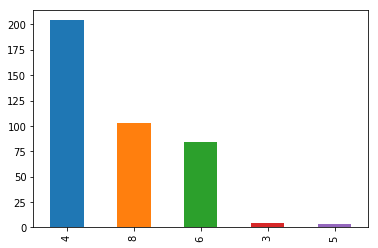

In [38]:
#pd.value_counts(cars_df['car name']).plot(kind = 'bar')
pd.value_counts(cars_df['cyl']).plot(kind = 'bar')


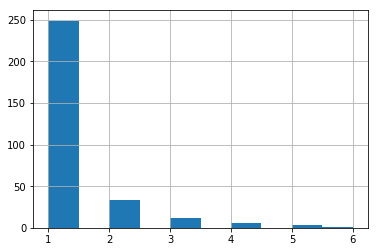

In [39]:
pd.value_counts(cars_df['car name']).hist(bins = 10)

In [40]:
len(cars_df['car name'].unique())

305

In [17]:
cars_df.cyl.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [18]:
cars_df.yr.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

### 2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

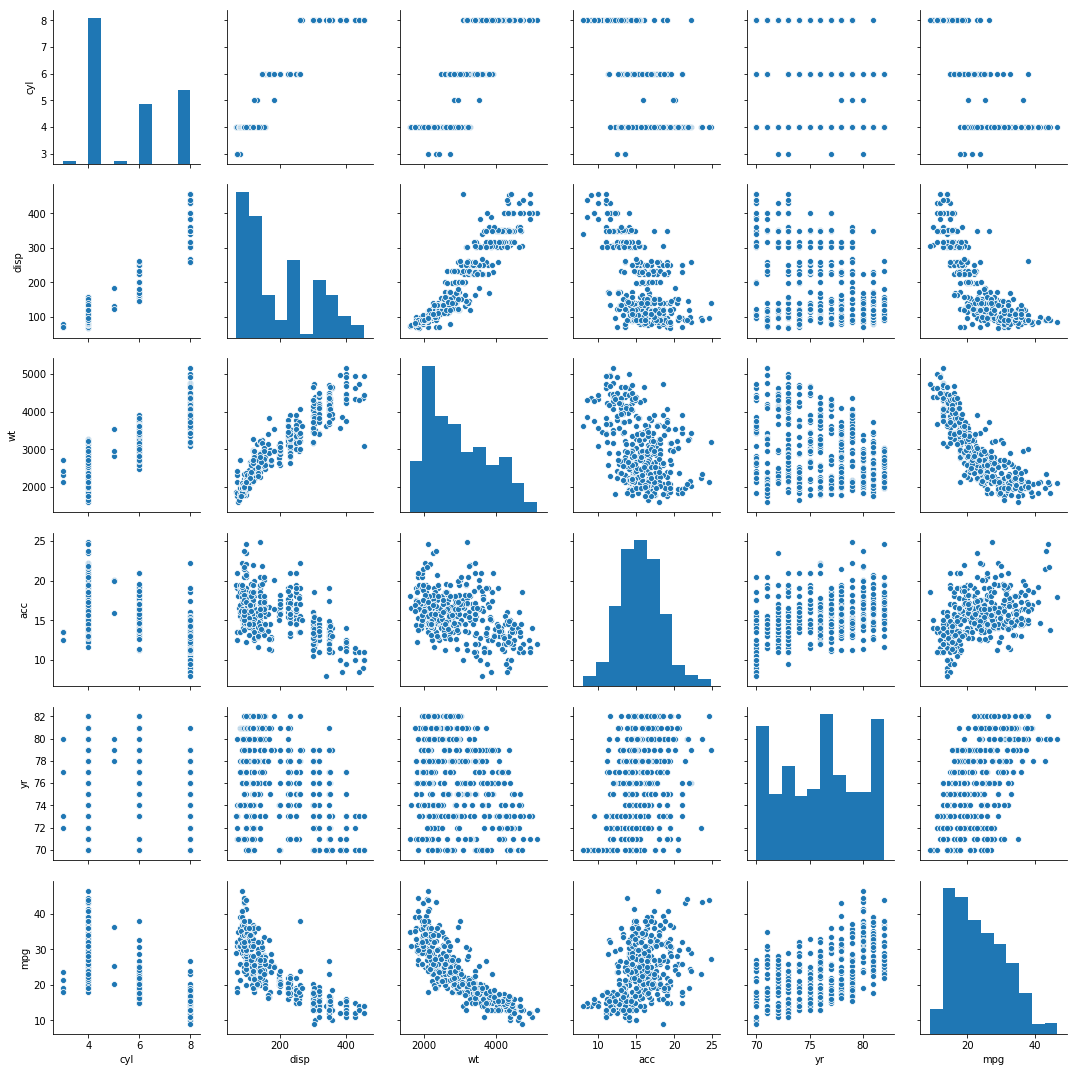

In [41]:
sns.pairplot(data=cars_df1)

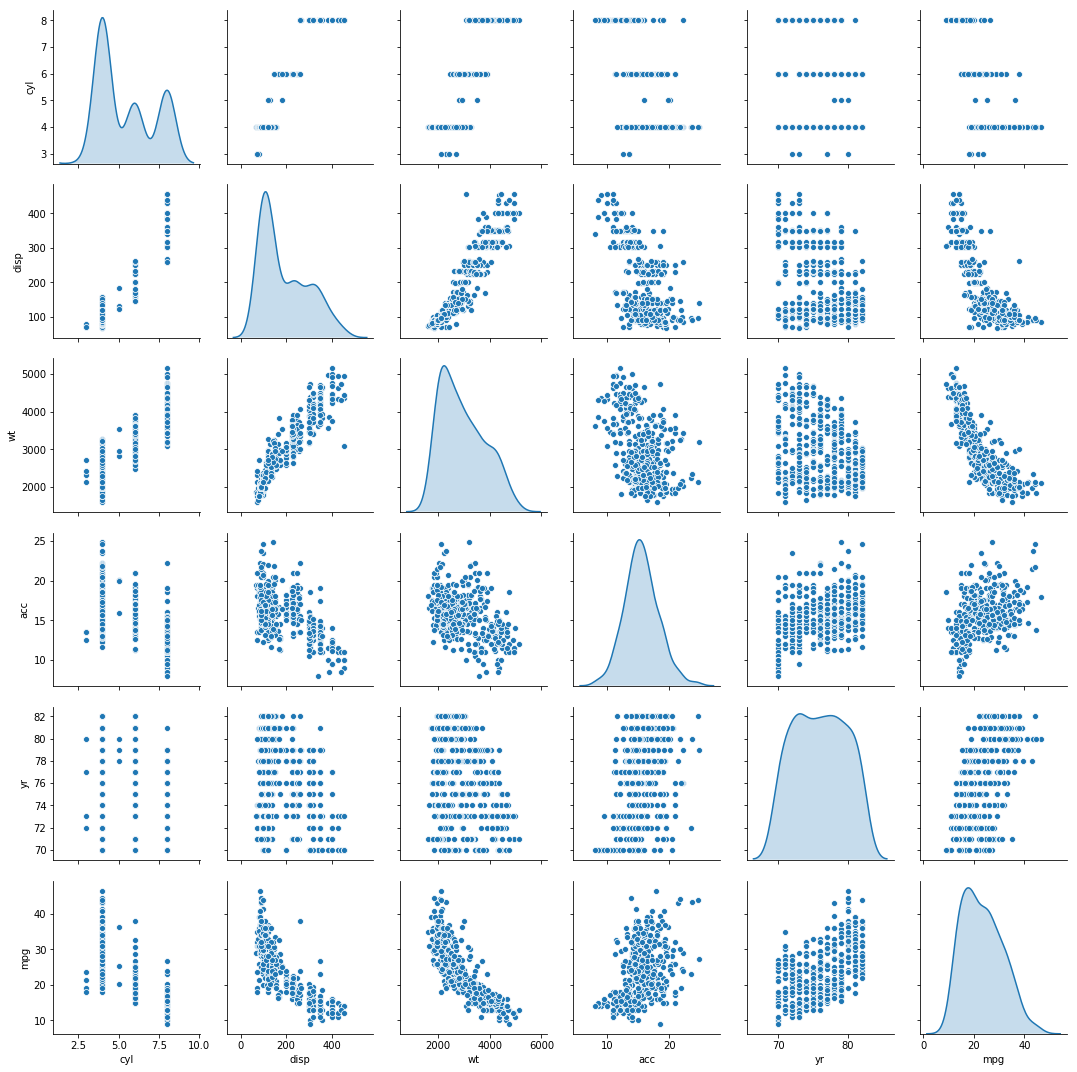

In [42]:
sns.pairplot(data=cars_df1, diag_kind='kde')

### 3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

### K-Means Clustering

In [43]:
distortion = []

In [44]:
from sklearn.cluster import KMeans

for i in range(1,10):
    km = KMeans(n_clusters=i, random_state=7)
    km.fit(cars_df1)
    distortion.append(km.inertia_)

In [45]:
distortion

[289055084.6480904,
 73993221.00768223,
 34018071.82870818,
 18888120.862761173,
 13623285.256759755,
 10167029.249286914,
 7513987.616760194,
 5519013.391633658,
 4655921.270479996]

Text(0, 0.5, 'Distortion')

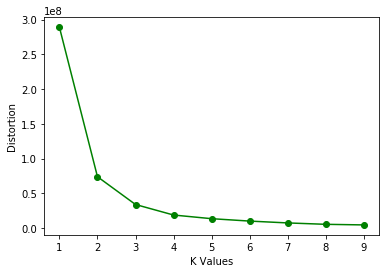

In [46]:
plt.plot(range(1,10), distortion, "go-")
plt.xlabel("K Values") # Number of Clusters
plt.ylabel("Distortion")

In [47]:
km = KMeans(n_clusters=3, random_state=7)
km.fit(cars_df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=7, tol=0.0001, verbose=0)

In [48]:
km.cluster_centers_

array([[4.03846154e+00, 1.06953297e+02, 2.21767033e+03, 1.63587912e+01,
        7.67307692e+01, 2.97510989e+01],
       [7.86666667e+00, 3.44144444e+02, 4.23632222e+03, 1.34633333e+01,
        7.40111111e+01, 1.46355556e+01],
       [5.77777778e+00, 2.10674603e+02, 3.15352381e+03, 1.59293651e+01,
        7.63968254e+01, 2.08484127e+01]])

In [50]:
colNames = ['cyl', 'disp', 'wt', 'acc', 'yr', 'mpg']
colNames

['cyl', 'disp', 'wt', 'acc', 'yr', 'mpg']

In [51]:
cluster_centers_df = pd.DataFrame(data=km.cluster_centers_, columns=colNames)

In [52]:
cluster_centers_df.head()

,cyl,disp,wt,acc,yr,mpg
0,4.038462,106.953297,2217.670330,16.358791,76.730769,29.751099
1,7.866667,344.144444,4236.322222,13.463333,74.011111,14.635556
2,5.777778,210.674603,3153.523810,15.929365,76.396825,20.848413


In [53]:
km.labels_

array([2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2,

In [54]:
cars_df1["Labels"] = km.labels_
cars_df1.head()

,cyl,disp,wt,acc,yr,mpg,Labels
0,8,307.0,3504,12.0,70,18.0,2
1,8,350.0,3693,11.5,70,15.0,1
2,8,318.0,3436,11.0,70,18.0,2
3,8,304.0,3433,12.0,70,16.0,2
4,8,302.0,3449,10.5,70,17.0,2


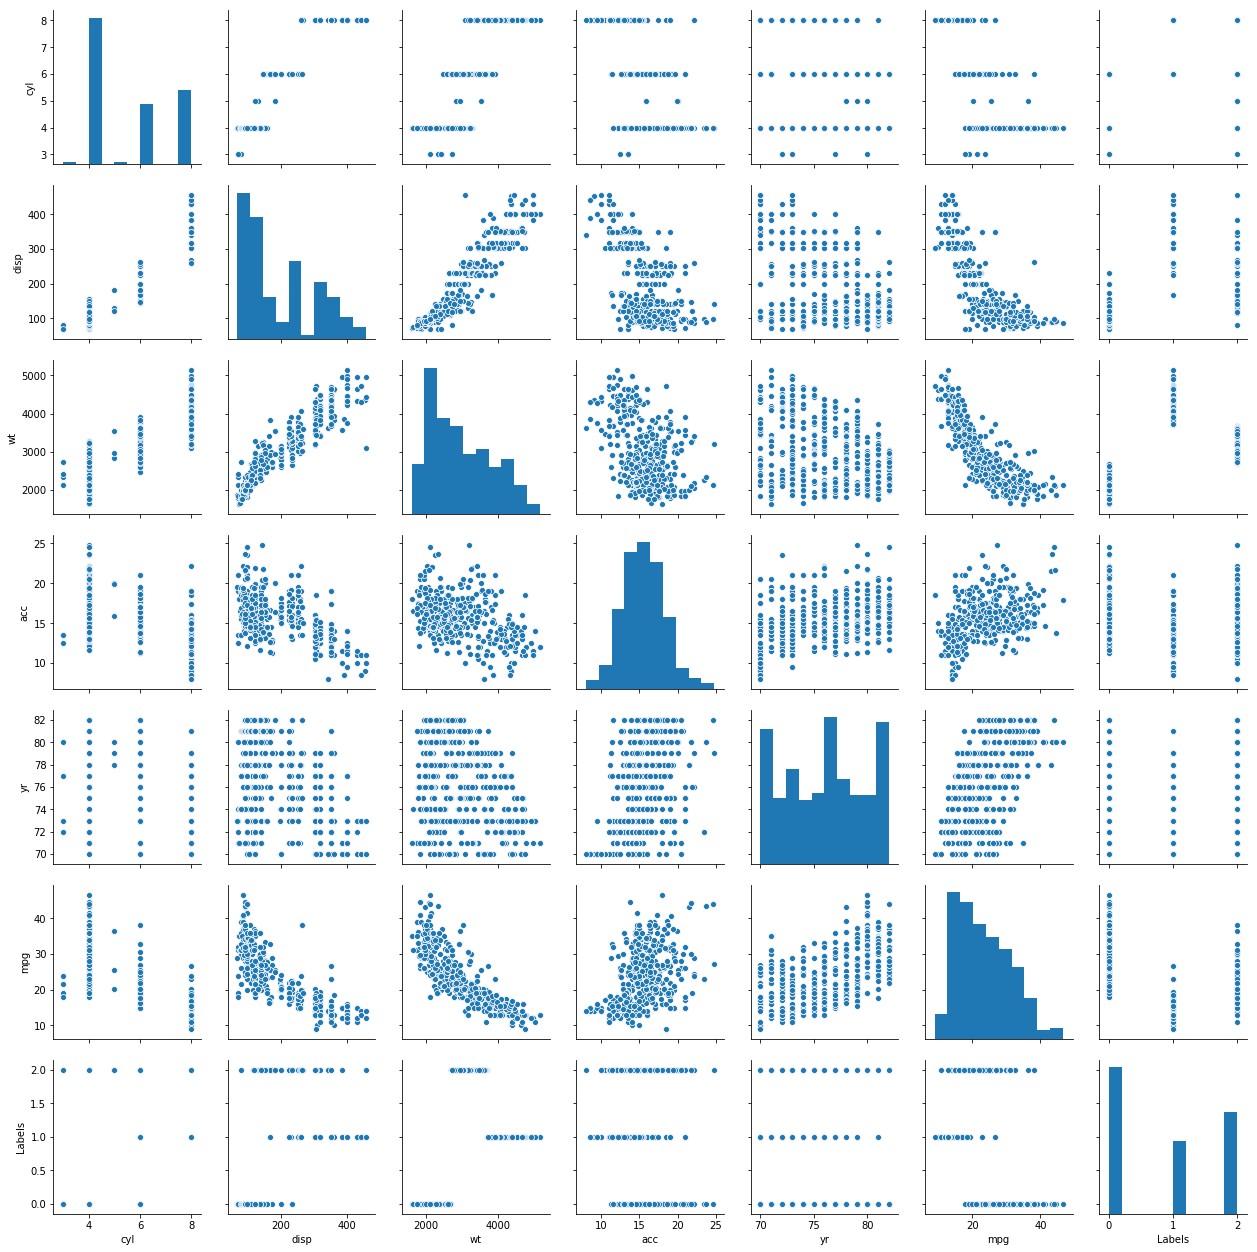

In [55]:
sns.pairplot(data=cars_df1)

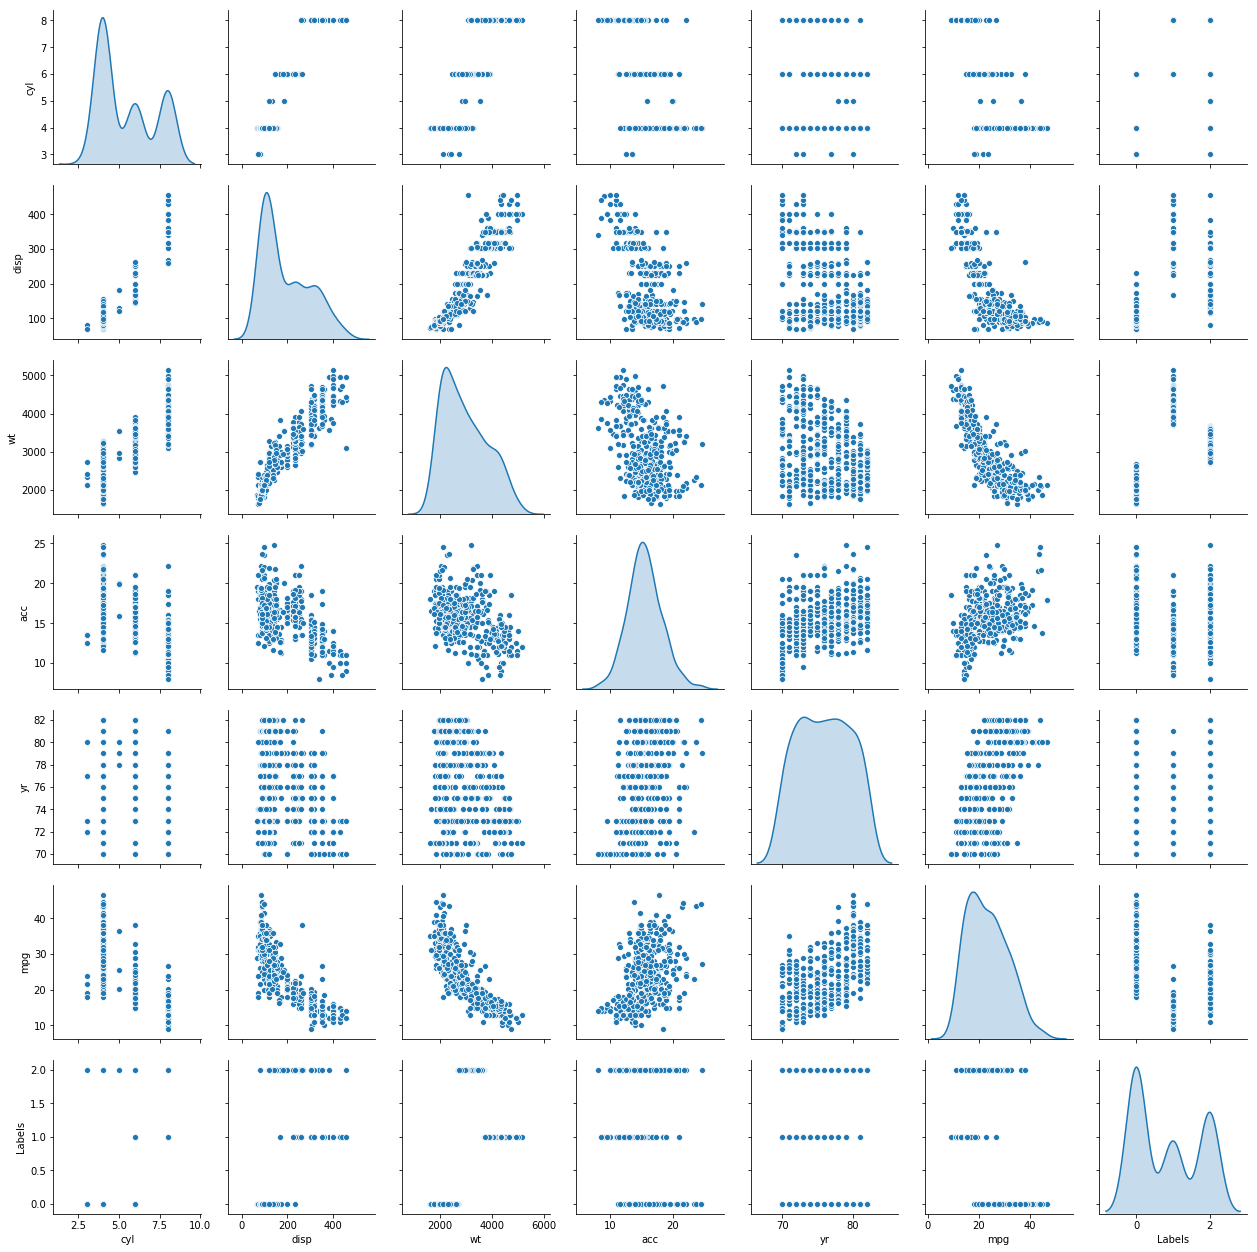

In [63]:
#ax = sns.scatterplot(data=cars_df1['Labels'])

sns.pairplot(data=cars_df1,diag_kind='kde')

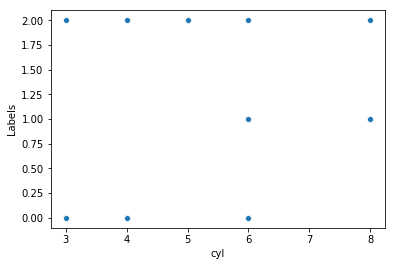

In [64]:
sns.scatterplot(cars_df1['cyl'],cars_df1['Labels'])

### 4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [75]:
cars_df_cluster_0 = cars_df1[cars_df1.Labels == 0]
cars_df_cluster_1 = cars_df1[cars_df1.Labels == 1]
cars_df_cluster_2 = cars_df1[cars_df1.Labels == 2]

In [76]:
cars_df_cluster_0.head()

,cyl,disp,wt,acc,yr,mpg,Labels
14,4,113.0,2372,15.0,70,24.0,0
17,6,200.0,2587,16.0,70,21.0,0
18,4,97.0,2130,14.5,70,27.0,0
19,4,97.0,1835,20.5,70,26.0,0
20,4,110.0,2672,17.5,70,25.0,0


In [77]:
cars_df_cluster_0.shape

(182, 7)

In [80]:
cars_df_cluster_1.head()

,cyl,disp,wt,acc,yr,mpg,Labels
1,8,350.0,3693,11.5,70,15.0,1
5,8,429.0,4341,10.0,70,15.0,1
6,8,454.0,4354,9.0,70,14.0,1
7,8,440.0,4312,8.5,70,14.0,1
8,8,455.0,4425,10.0,70,14.0,1


In [78]:
cars_df_cluster_1.shape

(90, 7)

In [81]:
cars_df_cluster_2.head()

,cyl,disp,wt,acc,yr,mpg,Labels
0,8,307.0,3504,12.0,70,18.0,2
2,8,318.0,3436,11.0,70,18.0,2
3,8,304.0,3433,12.0,70,16.0,2
4,8,302.0,3449,10.5,70,17.0,2
10,8,383.0,3563,10.0,70,15.0,2


In [79]:
cars_df_cluster_2.shape

(126, 7)

In [82]:
X_0_df = cars_df_cluster_0.loc[:, cars_df_cluster_0.columns != 'Labels']
y_0_df = cars_df_cluster_0.loc[:, cars_df_cluster_0.columns == 'Labels']

In [83]:
X_0_df.head()

,cyl,disp,wt,acc,yr,mpg
14,4,113.0,2372,15.0,70,24.0
17,6,200.0,2587,16.0,70,21.0
18,4,97.0,2130,14.5,70,27.0
19,4,97.0,1835,20.5,70,26.0
20,4,110.0,2672,17.5,70,25.0


In [84]:
y_0_df.head()

,Labels
14,0
17,0
18,0
19,0
20,0


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X_0_df,y_0_df,test_size = 0.3)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
lr_0 = LinearRegression()

In [89]:
lr_0.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
X_train.shape

(127, 6)

In [91]:
y_train.shape

(127, 1)

In [92]:
print(lr_0.score(X_train,y_train))
print(lr_0.score(X_test,y_test))

1.0
1.0


In [93]:
lr_0.coef_

array([[0., 0., 0., 0., 0., 0.]])

In [95]:
X_1_df = cars_df_cluster_1.loc[:, cars_df_cluster_1.columns != 'Labels']
y_1_df = cars_df_cluster_1.loc[:, cars_df_cluster_1.columns == 'Labels']

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X_1_df,y_1_df,test_size = 0.3)

In [97]:
lr_1 = LinearRegression()

In [98]:
lr_1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
X_train.shape

(63, 6)

In [100]:
y_train.shape

(63, 1)

In [101]:
print(lr_1.score(X_train,y_train))
print(lr_1.score(X_test,y_test))

1.0
1.0


In [102]:
lr_1.coef_

array([[0., 0., 0., 0., 0., 0.]])

In [103]:
X_2_df = cars_df_cluster_2.loc[:, cars_df_cluster_2.columns != 'Labels']
y_2_df = cars_df_cluster_2.loc[:, cars_df_cluster_2.columns == 'Labels']

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X_2_df,y_2_df,test_size = 0.3)

In [105]:
lr_2 = LinearRegression()

In [106]:
lr_2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [107]:
X_train.shape

(88, 6)

In [108]:
y_train.shape

(88, 1)

In [109]:
print(lr_2.score(X_train,y_train))
print(lr_2.score(X_test,y_test))

1.0
1.0


In [110]:
lr_2.coef_

array([[0., 0., 0., 0., 0., 0.]])